
# Face recognition with eigenfaces 

### Data: ["Labeled Face in the Wild"](http://vis-www.cs.umass.edu/lfw/index.html)

In [1]:
# basic imports
from time import time #to compute runtimes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get Data


In [2]:
from sklearn.datasets import fetch_lfw_people #data is part of Scikit Learn

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #get data - take some time

In [3]:
# get data shapes
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [4]:
# get data and labels
X = lfw_people.data #data
y = lfw_people.target #labels

In [5]:
n_features = X.shape[1] #get size of images
print("number of pixels per image:", n_features)

target_names = lfw_people.target_names #get unique IDs of people
n_classes = target_names.shape[0]

print("names of people", target_names)
print("number of people in DB:", n_classes)

number of pixels per image: 1850
names of people ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
number of people in DB: 7


Text(0.5, 1.0, 'George W Bush')

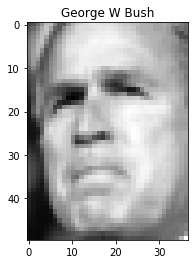

In [6]:
#vis example
plt.gray()
plt.imshow(X[12,:].reshape(h,w))
plt.title(target_names[y[12]])

## ML Model

### Task 1: Split in test and train set
* 20% test - 80% train -> use SKL split function!

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Task 2: Train and evaluate baseline Classifier
* use ***black box*** SVM Algorithm with default parameters -> [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [8]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)#train
SVM.score(X_test,y_test)#get accuracy score for test

0.7906976744186046

In [9]:
from sklearn.metrics import confusion_matrix
pred = SVM.predict(X_test)
confusion_matrix(y_test, pred)

array([[  6,   0,   2,   3,   0,   0,   0],
       [  1,  39,   0,   7,   0,   0,   0],
       [  0,   1,  13,   8,   0,   0,   0],
       [  0,   3,   0, 116,   0,   0,   0],
       [  0,   0,   0,   5,  10,   1,   3],
       [  0,   2,   0,   6,   1,   4,   0],
       [  0,   2,   0,   6,   3,   0,  16]])

### Task 3: Apply PCA to train data
* Plot Eigenvalues (explained variance) and find cut-off 
* Visualize the first 8 Eigenvectors
* Project all data (train+test) to Eigen-Face-Space
* Reconstruct a sample Face from Eigenfaces 

-> see [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

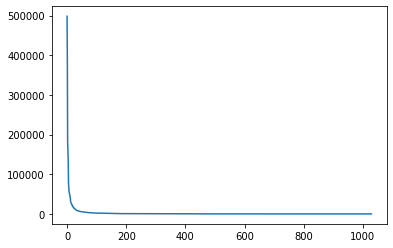

In [11]:
plt.plot(pca.explained_variance_)

In [29]:
pca = PCA(n_components=150, whiten=False)#set cut-off to 200
pca.fit(X_train)

PCA(n_components=150)

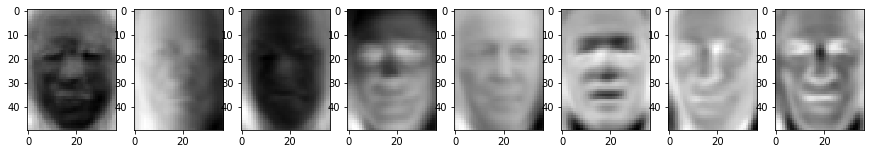

In [30]:
fig, axes = plt.subplots(1, 8,figsize=(15,6))
for i in range(8):
    axes[i].imshow(pca.components_[i].reshape(h,w))

In [31]:
#project
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

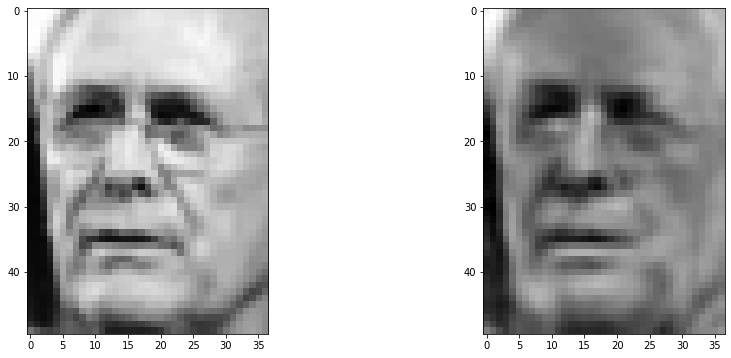

In [32]:
#vis example reconstruction
testimage=1
num_base=150
fig, axes = plt.subplots(1, 2,figsize=(15,6))
axes[0].imshow(X_train[testimage,:].reshape(h,w))
reconst = np.zeros((h*w)) #init 
for e in range(num_base): #set number of used basefunctions here
    reconst+=train_pca[testimage,e]*pca.components_[e]
axes[1].imshow(reconst.reshape(h,w))

### Task 4: Train a SVM on  the Eigen-Face representation 
* evaluate model on test

In [16]:
SVM.fit(train_pca, y_train)

SVC()

In [19]:
y_pred = SVM.predict(test_pca)




In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.36      0.53        11
     Colin Powell       0.82      0.89      0.86        47
  Donald Rumsfeld       1.00      0.68      0.81        22
    George W Bush       0.77      0.98      0.87       119
Gerhard Schroeder       1.00      0.74      0.85        19
      Hugo Chavez       1.00      0.38      0.56        13
       Tony Blair       1.00      0.67      0.80        27

         accuracy                           0.83       258
        macro avg       0.94      0.67      0.75       258
     weighted avg       0.86      0.83      0.82       258

[[  4   1   0   6   0   0   0]
 [  0  42   0   5   0   0   0]
 [  0   1  15   6   0   0   0]
 [  0   2   0 117   0   0   0]
 [  0   1   0   4  14   0   0]
 [  0   2   0   6   0   5   0]
 [  0   2   0   7   0   0  18]]
